### 复化求积公式

In [7]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def fun(x):
    return 1 /x;

In [35]:
x = np.arange(1,10,0.1)

In [36]:
y = fun(x)

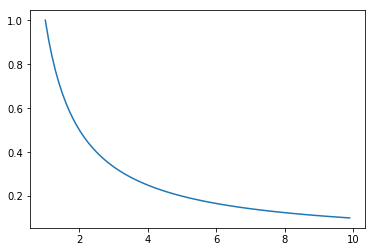

In [37]:
plt.plot(x,y)

### 基本的NewtonCotes
![NewtonCotes](img/NewtonCotes.png)

- 特点:
    - 因为使用高阶Newton-Cotes公式存在不稳定现象，故将区间进行等分，然后求解

### 复化梯形积分
- $\int_{a}^{b}f(x)dx \approx \frac{h}{2} (f(a) + f(b) + 2\sum_{i=1}^{n-1}f(x_{i})), h = x_{i+1}-x_{i} $ 
- ![梯形误差公式](img/梯形误差公式.png)

In [74]:
### 随着n依次增大，有效位数相同的额越多
def T(n):
    a = 1;b = 10
    h = (b - a) / n
    x = np.arange(a,b,h)
    sum = h / 2 * (fun(1) + fun(10) + 2 * np.sum( [ fun(x[i + 1]) for i in range(len(x) - 1)]))
    R = h**2 * 9 / 6
    return (sum,R)

In [75]:
np.log(10) - np.log(1)

2.302585092994046

In [76]:
n_list = [(i + 1) * 100 for i in range(10)]
sum = []
R = []
for n in n_list:
    tmp = T(n)
    sum.append(tmp[0])
    R.append(tmp[1])

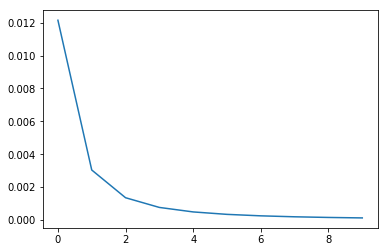

In [77]:
### 可以看出随着n依次增大，那么误差是呈
plt.plot(range(len(R)), R)

### 复化Simpson求积公式
![复化Simpson求积公式](img/复化Simpson求积公式.png)
![误差公式](img/Simpson误差公式.png)

In [82]:
def S(n):
    a = 1;b = 10
    h = (b - a) / n
    x = np.arange(a,b,h)
    sum = h / 6 * (fun(1) + fun(10) + 4 * np.sum([fun(x[i] + h / 2) for i in range(len(x) - 1)]) + 2 * np.sum([fun(x[i + 1]) for i in range(len(x) - 1)]))
    R = 9 * h**4 * 120 / 2880
    return (sum,R)

In [94]:
sum_s = []
R_s = []
s_list = [(i + 1) * 50 for i in range(10)]
for n in s_list:
    tmp = S(n)
    sum_s.append(tmp[0])
    R_s.append(tmp[1])

[0.01215,
 0.0030375,
 0.0013499999999999999,
 0.000759375,
 0.00048599999999999994]

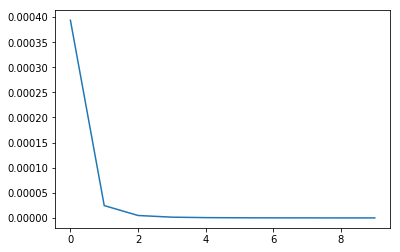

In [95]:
plt.plot(range(len(R_s)),R_s)
R[:5]

In [96]:
R_s[:5]

[0.00039366,
 2.460375e-05,
 4.859999999999999e-06,
 1.537734375e-06,
 6.298559999999999e-07]

### Conclusion 
- Simpson的收敛速度确实比梯形公式要快
- 而且公式